In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bs
import requests

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_url='https://cs.uwaterloo.ca/~dtompkin/archive/movies/all.html'
html=requests.get(main_url).content
soup=bs(html,'html.parser')

In [4]:
df=pd.read_html(html,header=0)[0]

In [5]:
df=df.drop('DVD?',axis=1)
df.columns=df.columns.str.title()

In [6]:
df['Year']=df['Title'].apply(lambda x:x.split(' ')[-1]).str.replace('(','').str.replace(')','')

df['Title']=df['Title'].apply(lambda x:' '.join(x.split(' ')[:-1]))

df['T-Meter']=df['T-Meter'].str.replace('%','').astype(float)

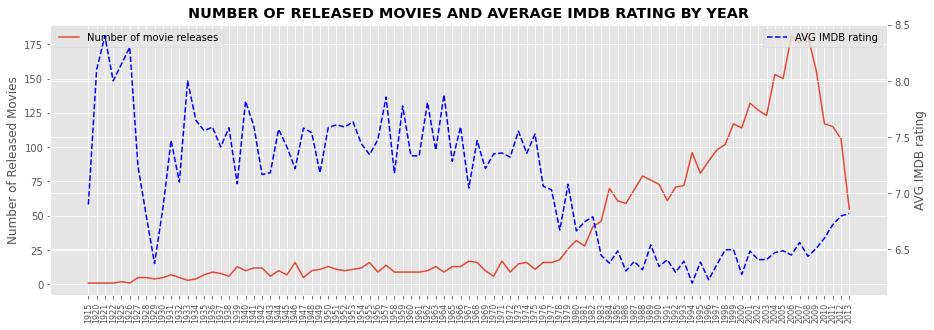

In [7]:
grouped=df.groupby('Year').agg({'Imdb':['count','mean']}).reset_index().sort_values('Year')

plt.figure(figsize=(15,5))
plt.plot(grouped['Year'],grouped['Imdb']['count'],label='Number of movie releases')
plt.xticks(grouped['Year'],rotation=90,fontsize=8)
plt.ylabel('Number of Released Movies')
plt.title('NUMBER OF RELEASED MOVIES AND AVERAGE IMDB RATING BY YEAR',fontweight='bold')
plt.legend()

ax2=plt.twinx()
ax2.plot(grouped['Year'],grouped['Imdb']['mean'],color='b',ls='--',label='AVG IMDB rating')
ax2.set_ylabel('AVG IMDB rating')
plt.legend()
plt.show()

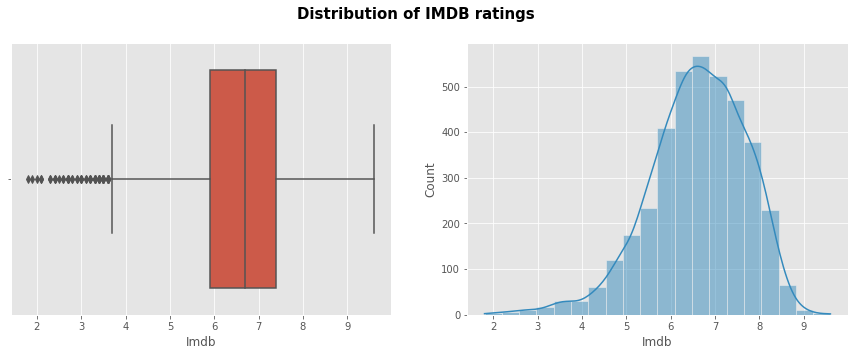

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df['Imdb'],ax=ax1)
sns.histplot(df['Imdb'],kde=True,ax=ax2,bins=20)
plt.suptitle('Distribution of IMDB ratings',size=15,fontweight='bold')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from xgboost import XGBRFRegressor
model=SVR()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [10]:
data=df[df['T-Meter'].notna()]
X=data[['Dave','Imdb']]
Y=data['T-Meter']

xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.2)

In [11]:
model.fit(xtrain,ytrain)

SVR()

In [12]:
train_prediction=model.predict(xtrain)
test_prediction=model.predict(xtest)

In [13]:
r2_train=metrics.r2_score(train_prediction,ytrain)
r2_test=metrics.r2_score(test_prediction,ytest)

mae_train=metrics.mean_absolute_error(train_prediction,ytrain)
mae_test=metrics.mean_absolute_error(test_prediction,ytest)

rmse_train=metrics.mean_squared_error(train_prediction,ytrain,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,ytest,squared=False)

print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.5930471882872153 0.606727207406339
12.193492513594737 11.974223897001773
15.896996018026645 15.440976696276891


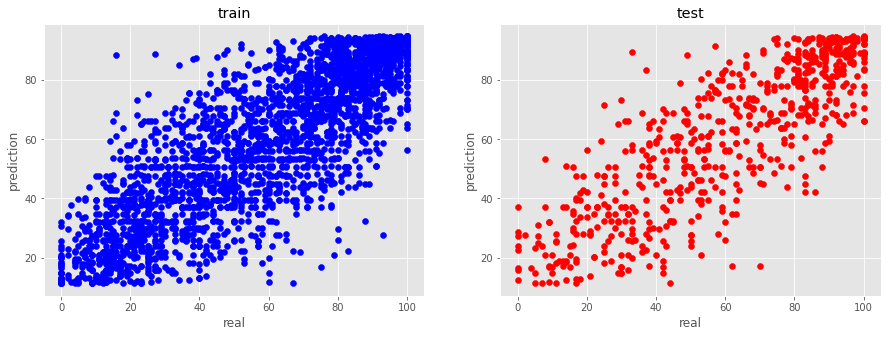

In [14]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(ytrain,train_prediction,c='blue')
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')

ax2.scatter(ytest,test_prediction,c='red')
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')

plt.show()

In [15]:
nan=df[df['T-Meter'].isna()][['Dave','Imdb']]
nan_prediction=model.predict(nan)
nan['pred']=nan_prediction
nan

,Dave,Imdb,pred
25,6,5.8,40.328828
28,6,7.2,77.927004
40,7,7.3,81.356717
47,4,2.7,23.504435
48,7,7.6,87.282877
...,...,...,...
3866,8,7.5,86.315375
3869,5,6.3,50.542163
3870,3,5.9,30.659833
3871,8,7.4,84.461395
